In [3]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from icecream import ic

In [4]:
import torch

# Define the tensors
tensor1 = torch.tensor([[[ 0.9455,  1.0387, -0.6669,  0.2660, -0.9360,  1.1565,  1.1014, 
                           -1.0648, -0.7702, -0.9429, -0.7483,  0.5296,  0.7678, -0.5794,
                            1.2822,  0.7509,  1.1877, -0.1512,  0.8183,  0.4583,  0.9764,
                           -1.0279, -0.8702, -1.1563,  0.5476,  0.9408, -0.5698, -0.9416,
                            0.2904,  0.9508,  1.2925, -0.8793]]], device='cuda:0')

tensor2 = torch.tensor([[[ 0.9455,  1.0387, -0.6669,  0.2660, -0.9360,  1.1565,  1.1014,
                           -1.0648, -0.7702, -0.9429, -0.7483,  0.5296,  0.7678, -0.5794,
                            1.2822,  0.7509,  1.1877, -0.1512,  0.8183,  0.4583,  0.9764,
                           -1.0279, -0.8702, -1.1563,  0.5476,  0.9408, -0.5698, -0.9416,
                            0.2904,  0.9508,  1.2925, -0.8793],
                         [ 0.2791,  0.4897, -0.2010, -0.4020, -0.5962,  0.3506,  0.3721,
                           -0.4154, -0.2888, -0.4064, -0.6073,  0.1135,  0.2693, -0.4925,
                            0.5379,  0.2661,  0.5354, -0.0541,  0.3666,  0.2847,  0.4361,
                           -0.2763, -0.4152, -0.4934,  0.3097,  0.2412, -0.2690, -0.5906,
                            0.1646,  0.2906,  0.5977, -0.2661]]], device='cuda:0')

# Concatenate the tensors
result = torch.cat((tensor2, tensor1), dim=1)

print(result)


tensor([[[ 0.9455,  1.0387, -0.6669,  0.2660, -0.9360,  1.1565,  1.1014,
          -1.0648, -0.7702, -0.9429, -0.7483,  0.5296,  0.7678, -0.5794,
           1.2822,  0.7509,  1.1877, -0.1512,  0.8183,  0.4583,  0.9764,
          -1.0279, -0.8702, -1.1563,  0.5476,  0.9408, -0.5698, -0.9416,
           0.2904,  0.9508,  1.2925, -0.8793],
         [ 0.2791,  0.4897, -0.2010, -0.4020, -0.5962,  0.3506,  0.3721,
          -0.4154, -0.2888, -0.4064, -0.6073,  0.1135,  0.2693, -0.4925,
           0.5379,  0.2661,  0.5354, -0.0541,  0.3666,  0.2847,  0.4361,
          -0.2763, -0.4152, -0.4934,  0.3097,  0.2412, -0.2690, -0.5906,
           0.1646,  0.2906,  0.5977, -0.2661],
         [ 0.9455,  1.0387, -0.6669,  0.2660, -0.9360,  1.1565,  1.1014,
          -1.0648, -0.7702, -0.9429, -0.7483,  0.5296,  0.7678, -0.5794,
           1.2822,  0.7509,  1.1877, -0.1512,  0.8183,  0.4583,  0.9764,
          -1.0279, -0.8702, -1.1563,  0.5476,  0.9408, -0.5698, -0.9416,
           0.2904,  0.9508,  1

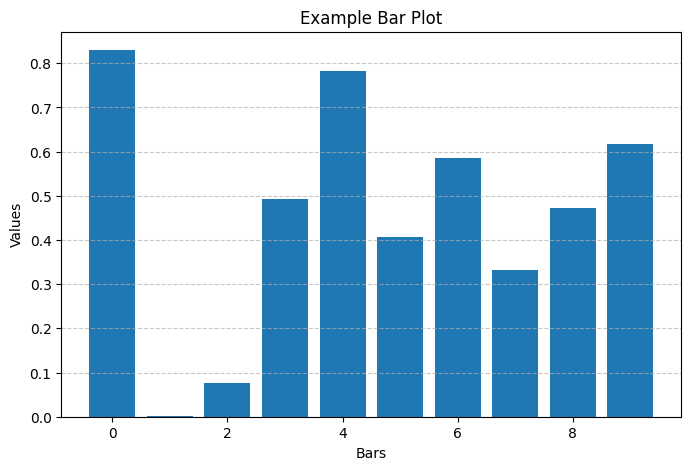

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_1d_bar(array, title="Bar Plot", xlabel="Index", ylabel="Value", figsize=(10, 6), filename=None):
    """
    Plots a 1D array as a bar plot.

    Parameters:
        array (np.ndarray or torch.Tensor): Input 1D data.
        title (str): Title of the bar plot. Default is "Bar Plot".
        xlabel (str): Label for the X-axis. Default is "Index".
        ylabel (str): Label for the Y-axis. Default is "Value".
        figsize (tuple): Size of the figure (width, height) in inches. Default is (10, 6).
        filename (str): If provided, saves the plot to the specified file. Default is None (shows the plot).
    """
    # If the input is a PyTorch tensor, move it to CPU and convert to NumPy
    if isinstance(array, torch.Tensor):
        array = array.detach().cpu().numpy()
    
    # Check if the array is 1D
    if array.ndim != 1:
        raise ValueError("Input array must be 1D.")
    
    # Create the bar plot
    plt.figure(figsize=figsize)
    indices = np.arange(len(array))  # Create indices for the bars
    plt.bar(indices, array)
    
    # Add labels, title, and grid
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save or show the plot
    if filename:
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
        print(f"Bar plot saved as {filename}")
    else:
        plt.show()

# Example usage
if __name__ == "__main__":
    # Example 1D array
    array = np.random.rand(10)
    
    # Plot the bar chart
    plot_1d_bar(array, title="Example Bar Plot", xlabel="Bars", ylabel="Values", figsize=(8, 5))


In [2]:
array

array([[-0.66825557, -0.05673065, -0.17711444, -1.6783748 , -0.29802388,
         2.1337466 ,  1.0949254 , -0.08776329, -0.01170667,  1.6020985 ],
       [-0.9185559 ,  1.2632332 , -0.9069594 , -1.9658595 , -1.7410992 ,
         0.59797204,  1.1281397 ,  1.0764327 ,  1.3510358 , -1.5187458 ],
       [ 0.7550537 , -1.5338362 , -1.980872  ,  0.46362972, -0.42046255,
        -0.8578726 ,  1.2081594 ,  0.6019232 , -0.06484839,  0.18613192],
       [ 0.09012274, -0.0520025 ,  0.43001786,  1.7959127 , -1.419713  ,
        -0.2446891 ,  0.00541782,  0.44614363, -0.48602661, -0.9331221 ],
       [-1.9675297 ,  0.22631194,  0.45887166, -0.18419692,  0.06795977,
         0.02103891,  2.0078776 ,  1.7384943 , -0.13205607,  0.11146186],
       [-0.09023258, -0.5078589 ,  0.61996543, -0.5564425 , -0.07845986,
        -0.4472463 , -2.2985518 ,  1.1332798 ,  0.09683455, -0.2825139 ],
       [ 0.13542692,  0.04401494, -1.6593816 , -0.18882062, -0.40961826,
        -0.94193447, -0.5023711 , -0.05268313